# Survival Analysis

* Calculates the survival rates for groups that have something in common
* Uses cases:
    * Estimating human lifespans
    * Estimating mechanical failures over time
    * Estimating length of customer retention
    * Estimating time to recovery for illnesses
*  Requirements:
    * A column in your dataframe that represents the occurrence (or lack thereof) of an event
    * A column in your dataframe that represents the passage of time
    * One or more columns to `groupby` (these represent the things your groups have in common)

In [2]:
import pandas as pd
import numpy as np

from lifelines import KaplanMeierFitter

In [4]:
df = (pd.read_csv('../lab-survival-analysis/churn.csv'))[['gender', 'SeniorCitizen', 'InternetService', 'tenure', 'Churn']]

df.columns = [col.lower() for col in df]

df.head()

,gender,seniorcitizen,internetservice,tenure,churn
0,Female,0,DSL,1,No
1,Male,0,DSL,34,No
2,Male,0,DSL,2,Yes
3,Male,0,DSL,45,No
4,Female,0,Fiber optic,2,Yes


Convert churn to binary values

In [5]:
df['churn'] = np.where(df['churn'] == 'Yes', 1, 0)

df.head()

,gender,seniorcitizen,internetservice,tenure,churn
0,Female,0,DSL,1,0
1,Male,0,DSL,34,0
2,Male,0,DSL,2,1
3,Male,0,DSL,45,0
4,Female,0,Fiber optic,2,1


we want to study how retention rates decline as tenure increases among the different groups of customers we have in our data set

In [6]:
def survival(data, groupby_col, time_col, event_col):
    model = KaplanMeierFitter()
    results = []
    
    for i in data[groupby_col].unique():
        group = data[data[groupby_col] == i] #subset with all values in each column looping through all unique values
        T = group[time_col] 
        E = group[event_col]
        model.fit(T, E, label = str(i))
        results.append(model.survival_function_)
        
    return pd.concat(results, axis = 1)

In [8]:
rates = survival(df, 'gender', 'tenure', 'churn')

rates.head()

,Female,Male
timeline,,
0.0,1.000000,1.000000
1.0,0.946598,0.945337
2.0,0.926476,0.929190
3.0,0.911382,0.916052
4.0,0.896950,0.905107


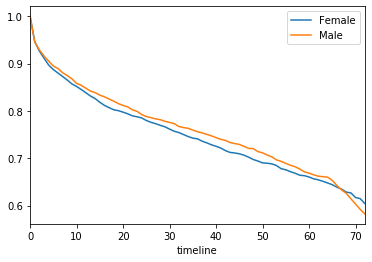

In [9]:
rates.plot()

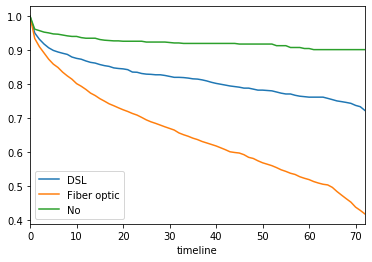

In [11]:
survival(df, 'internetservice', 'tenure', 'churn').plot()

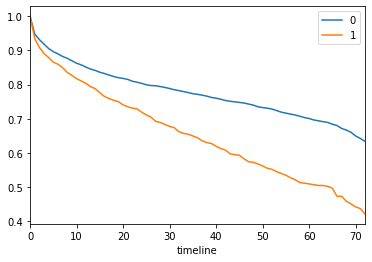

In [12]:
survival(df, 'seniorcitizen', 'tenure', 'churn').plot()